In [2]:
!pip install pandas

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
     |################################| 10.1MB 6.1MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [14]:
#loading python modules
import numpy 

import matplotlib.pyplot

import cartopy.crs

import pandas as pd

In [15]:
'''
data=pd.read_csv('lat_long_depth.txt', header=None) 

#data2=pd.read_csv('wells_for_map.csv')
'''

"\ndata=pd.read_csv('lat_long_depth.txt', header=None) \n\n#data2=pd.read_csv('wells_for_map.csv')\n"

In [ ]:
'''
type(data)
data[0][0]

longs=data[0]
lats=data[1]
depth=data[2]
'''

In [ ]:
'''
hole=data2['Total Penetration (mbsf)']

n=data2['Well Name']
'''

In [7]:
data3=pd.read_csv('Passive margin wells v2.csv')

In [8]:
print(data3)

         Well Name Program  Expedition  Site Hole  \
0       DSDP 10-85    DSDP          10    85    *   
1      DSDP 10-85A    DSDP          10    85    A   
2       DSDP 10-86    DSDP          10    86    *   
3       DSDP 10-87    DSDP          10    87    *   
4       DSDP 10-90    DSDP          10    90    *   
5       DSDP 10-91    DSDP          10    91    *   
6       DSDP 10-92    DSDP          10    92    *   
7       DSDP 10-93    DSDP          10    93    *   
8       DSDP 10-94    DSDP          10    94    *   
9       DSDP 10-95    DSDP          10    95    *   
10      DSDP 10-96    DSDP          10    96    *   
11        DSDP 1-1    DSDP           1     1    *   
12     DSDP 11-107    DSDP          11   107    *   
13     DSDP 11-108    DSDP          11   108    *   
14      DSDP 11-98    DSDP          11    98    *   
15        DSDP 1-2    DSDP           1     2    *   
16     DSDP 12-116    DSDP          12   116    *   
17    DSDP 12-116A    DSDP          12   116  

In [9]:
longs=data3['Longitude']
lats=data3['Latitude']

depth=data3['Water Depth (m)'] #water depth to well
hole=data3['Total Penetration (mbsf)'] #well pepetration below sea floor

n=data3['Well Name']

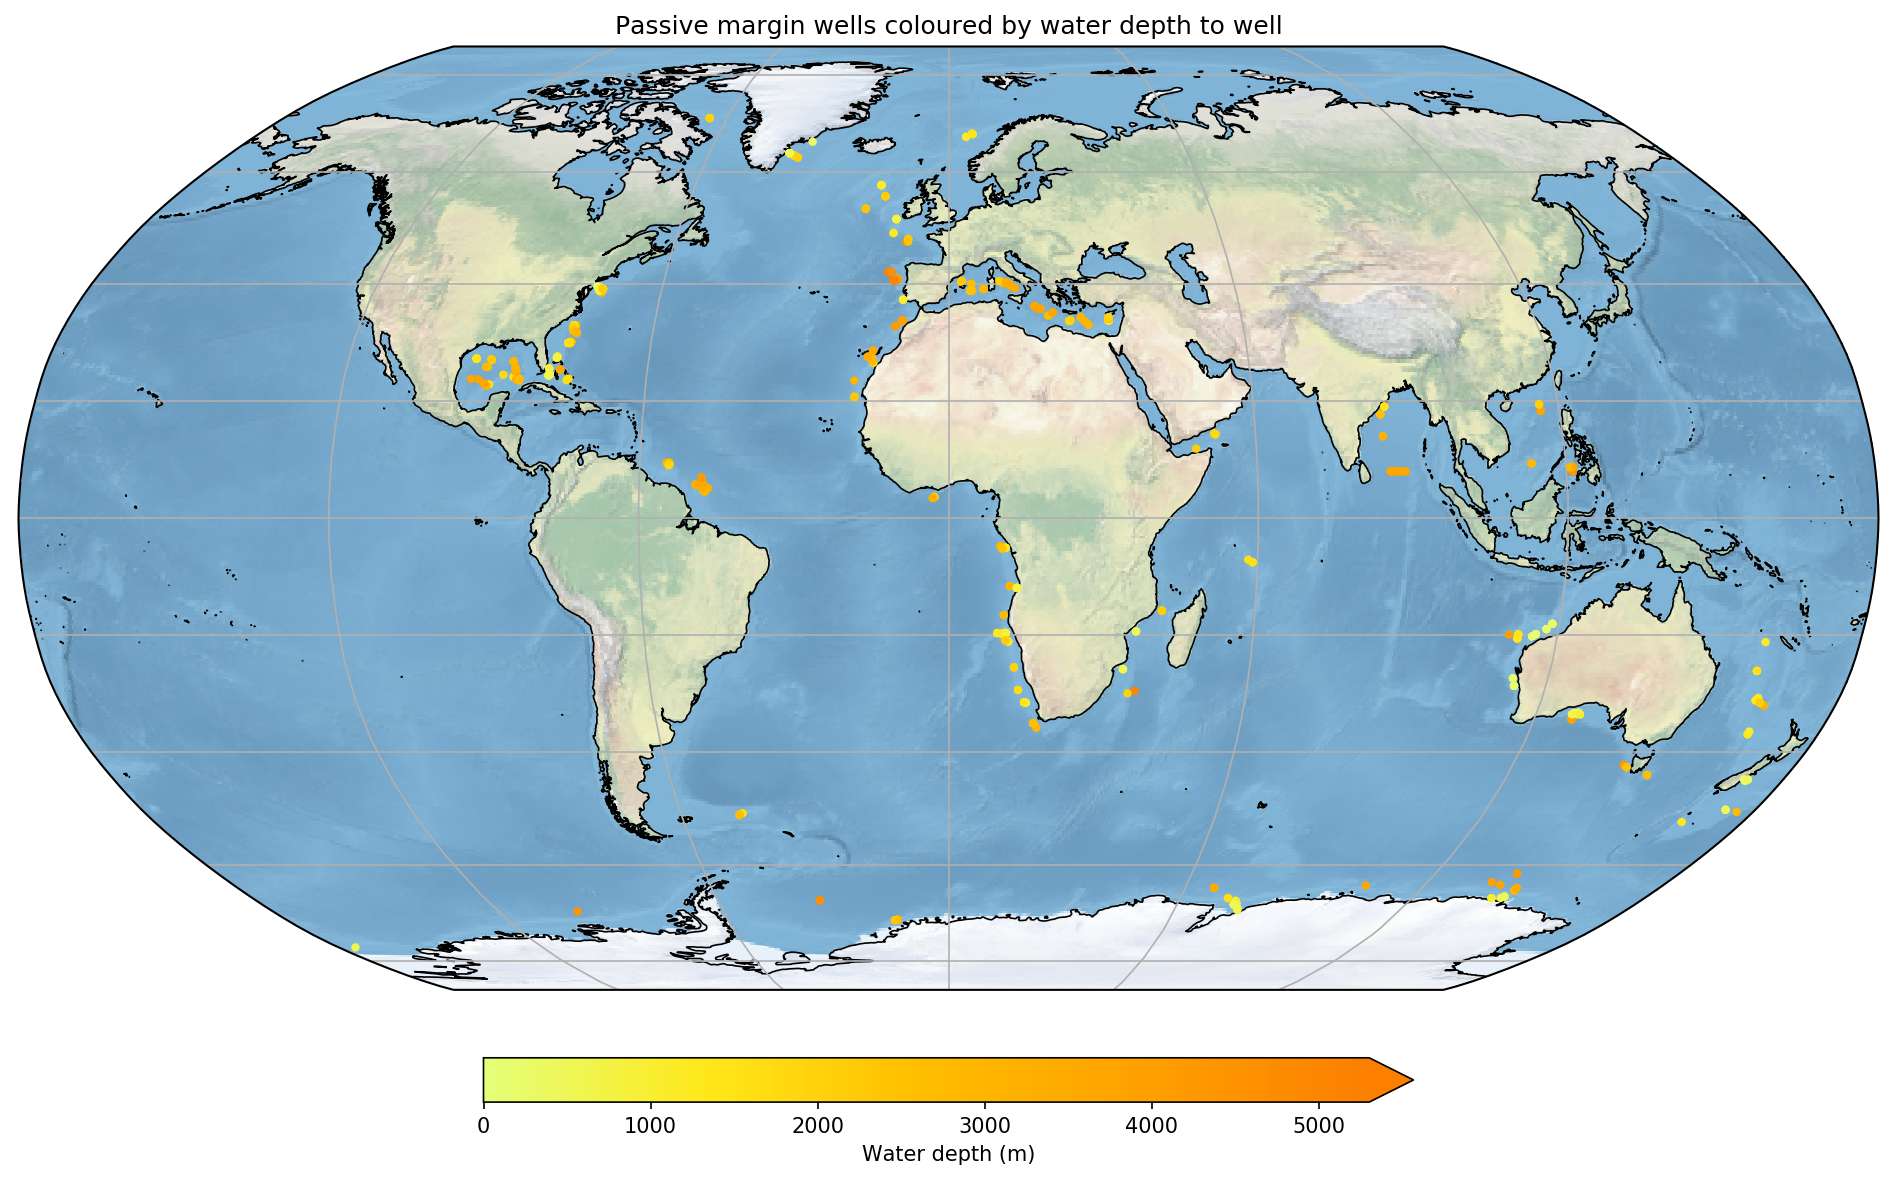

In [20]:
#map
fig = matplotlib.pyplot.figure(figsize=(16,12),dpi=150)

ax = matplotlib.pyplot.axes(projection=cartopy.crs.Robinson())
#Also could use PlateCarree or Mercator, both of these are supported with gridline labels

#Earth-specific details from cartopy module
ax.set_global()
ax.coastlines('50m', linewidth=0.8)
ax.stock_img()
ax.gridlines()#draw_labels=True for gridline labels on supported projections above

#data into map
mapscat=ax.scatter(longs,lats,marker=".",c=depth,vmin=0,vmax=5300,transform=cartopy.crs.Geodetic(),zorder=4,cmap=matplotlib.pyplot.cm.Wistia)

cbar=matplotlib.pyplot.colorbar(mapscat, ax=ax, orientation="horizontal", pad=0.05, fraction=0.15, shrink=0.5,extend='max')
cbar.set_label('Water depth (m)')

matplotlib.pyplot.title('Passive margin wells coloured by water depth to well')
matplotlib.pyplot.show()

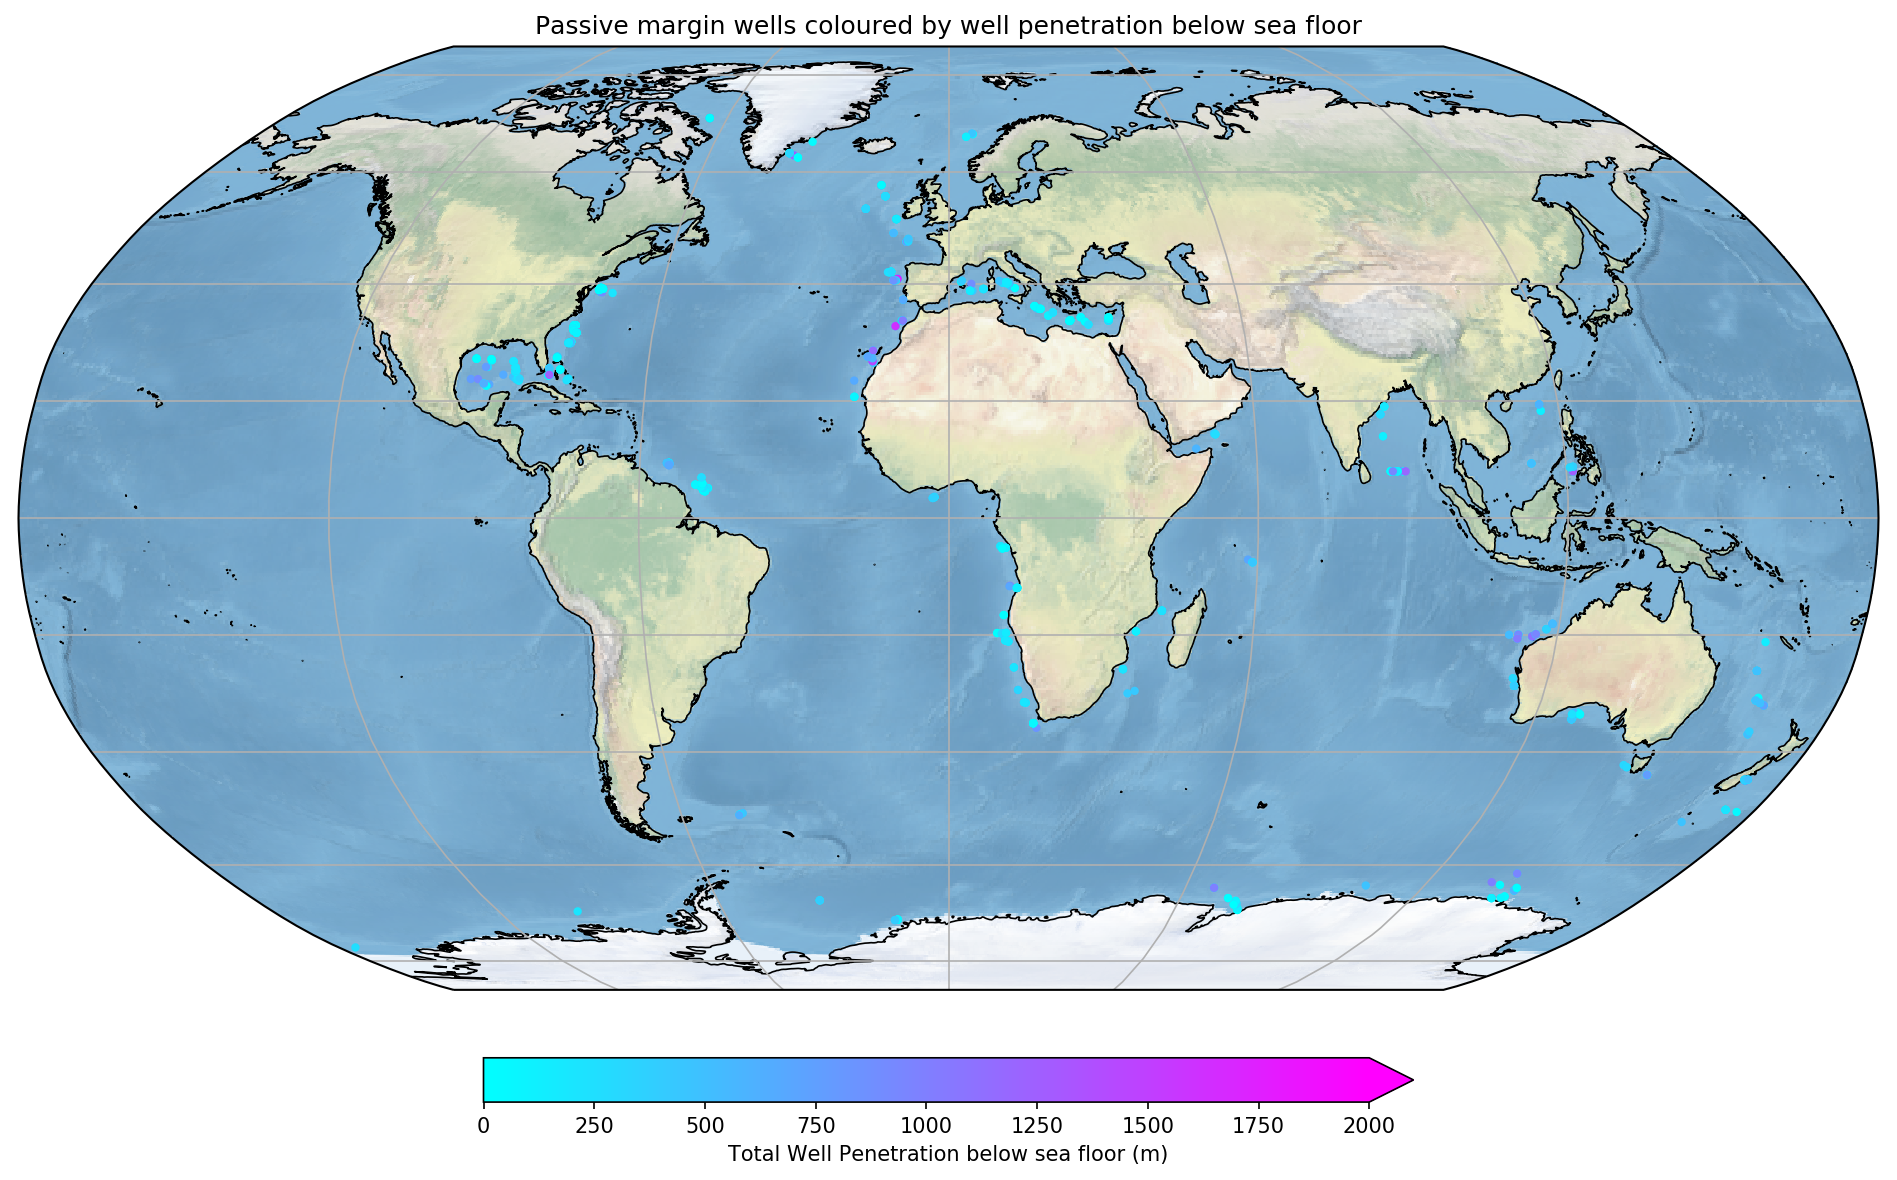

In [97]:
#depth below sea floor
fig = matplotlib.pyplot.figure(figsize=(16,12),dpi=150)

ax = matplotlib.pyplot.axes(projection=cartopy.crs.Robinson()) #map projection to plot over.
#Also could use PlateCarree or Mercator, both of these are supported with gridline labels

ax.set_global()
ax.coastlines('50m', linewidth=0.8)
ax.stock_img()
ax.gridlines()#draw_labels=True for gridline labels on supported projections above

mapscat=ax.scatter(longs,lats,marker=".",c=hole,vmin=0,vmax=2000,transform=cartopy.crs.Geodetic(),zorder=4,cmap=matplotlib.pyplot.cm.cool)

cbar=matplotlib.pyplot.colorbar(mapscat, ax=ax, orientation="horizontal", pad=0.05, fraction=0.15, shrink=0.5,extend='max')
cbar.set_label('Total Well Penetration below sea floor (m)')

matplotlib.pyplot.title('Passive margin wells coloured by well penetration below sea floor')

#attempting to label wells
#for i, txt in enumerate(n):
    #ax.annotate(txt, (longs[i], lats[i]), size=5, xytext=(3,2), ha='left', textcoords='offset points')
    
    
matplotlib.pyplot.show()

<Figure size 6000x8000 with 0 Axes>

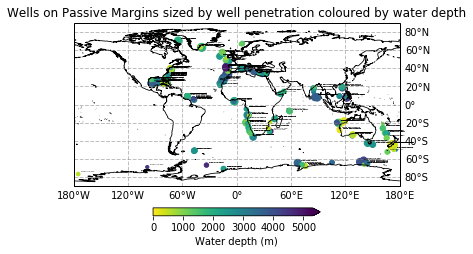

In [144]:
#ploting data points, sized by cobalt abundence and coloured by deposit age
fig = matplotlib.pyplot.figure(figsize=(120,160),dpi=50)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,projection=cartopy.crs.PlateCarree())

ax.set_global()
ax.coastlines('50m', linewidth=0.8)
#ax.stock_img()#to add map colour image

mapscat = ax.scatter(longs,lats,s=hole/20,c=depth,vmin=0, vmax=5300,cmap=matplotlib.pyplot.cm.viridis_r)
matplotlib.pyplot.title('Wells on Passive Margins sized by well penetration coloured by water depth')

#grid lines and labels
gl = ax.gridlines(draw_labels=True,linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

#colour bar
cbar=matplotlib.pyplot.colorbar(mapscat, ax=ax, orientation="horizontal", pad=0.1, fraction=0.15, shrink=0.5,extend='max')
cbar.set_label('Water depth (m)')

#well labels
for i, txt in enumerate(n):
    ax.annotate(txt, (longs[i], lats[i]), size=2, xytext=(3,2), ha='left', textcoords='offset points')

########## make it cant make it bigger


#ax.show()

In [ ]:
#just stuff for ubove cell

ax = matplotlib.pyplot.axes(projection=cartopy.crs.Mercator())
ax.set_global()
ax.coastlines('50m', linewidth=0.8)
ax.stock_img()
ax.gridlines(draw_labels=True)

#######

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


ax = plt.axes(projection=cartopy.crs.Mercator())
ax.coastlines()

gl = ax.gridlines(ccrs=cartopy.crs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlines = False
#gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

Text(0.5,1,'Passive Margin Well Water Depth')

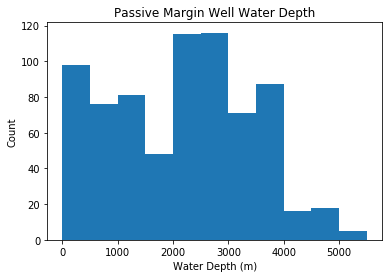

In [24]:
 #histogram for well water depth
mu = numpy.mean(depth) #mean of distribution
sigma = numpy.std(depth) #standard deviation
x = depth

matplotlib.pyplot.hist(x, bins=[0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500])

matplotlib.pyplot.xlabel('Water Depth (m)')
matplotlib.pyplot.ylabel('Count')
matplotlib.pyplot.title('Passive Margin Well Water Depth')

Text(0.5,1,'Passive Margin Well Drill Depth Below Sea Floor')

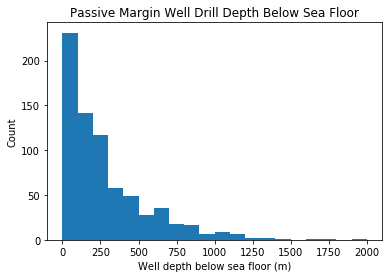

In [25]:
#histogram for well penetration belkow sea floor
mu = numpy.mean(hole) #mean of distribution
sigma = numpy.std(hole) #standard deviation
x = hole

matplotlib.pyplot.hist(x, bins=[0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000])

matplotlib.pyplot.xlabel('Well depth below sea floor (m)')
matplotlib.pyplot.ylabel('Count')
matplotlib.pyplot.title('Passive Margin Well Drill Depth Below Sea Floor')

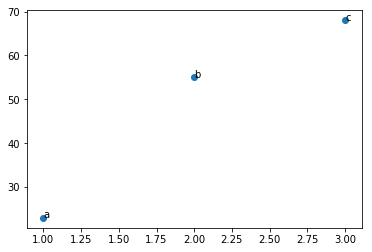

In [50]:
#a method to label points on a scatter plot
g=['a', 'b', 'c']
x=[1,2,3]
y=[23,55,68]

fig, ax = plt.subplots()
ax.scatter(x, y)
                    

for i, txt in enumerate(g):
    ax.annotate(txt, (x[i], y[i]))

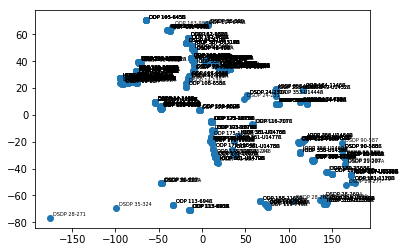

In [47]:
fig, ax = plt.subplots()
ax.scatter(longs, lats)
                    

for i, txt in enumerate(n):
    ax.annotate(txt, (longs[i], lats[i]), size=5, xytext=(3,2), ha='left', textcoords='offset points')

In [ ]:
#type(data2)

#n = n.applymap(str)

#df = [str(i) for i in n.values]

#n = [str(i) for i in n.values]